#           ***Inheritance***

### Child Class will inherit attributes and method of parent class

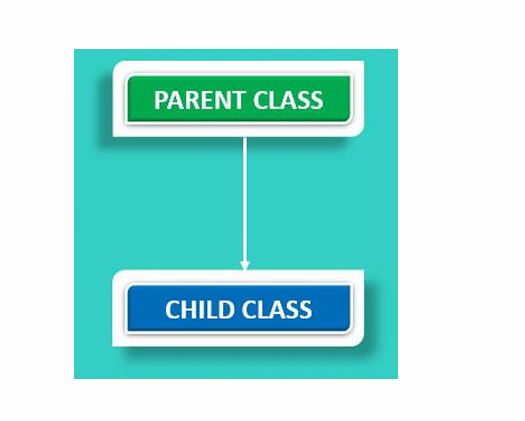

## Single  Inheritance

Parent -> Child 

One Parent ~ One Child

In [146]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My Name is {self.name}. I am {self.age} years old")

In [147]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [148]:
p1 = Person(name="Rahul", age=23)
print(type(p1))

<class '__main__.Person'>


In [149]:
p1.name

'Rahul'

In [150]:
p1.intro()

My Name is Rahul. I am 23 years old


In [151]:
e1 = Employee(name="Sarthak", age=22, company="TCS")
print(type(e1))

<class '__main__.Employee'>


In [152]:
e1.name

'Sarthak'

In [153]:
e1.age

22

In [154]:
e1.company

'TCS'

In [155]:
e1.work()

I work at TCS


In [156]:
e1.intro()

My Name is Sarthak. I am 22 years old


In [157]:
e1.intro()
e1.work()

My Name is Sarthak. I am 22 years old
I work at TCS


In [158]:
print(e1)

In [159]:
e2 = Employee(name="Aditi", age=22, company="Infosys")

In [160]:
e2.name

'Aditi'

In [161]:
e2.age

22

In [162]:
e2.work()

I work at Infosys


In [163]:
e2.work()
e2.intro()

I work at Infosys
My Name is Aditi. I am 22 years old


## I want to do easy Data Validation

##### Library Pydantic -> To validate Data
##### Pydantic contains class called BaseModel -> Validates the Data for You
##### Field is used to add different constraints on Data

In [164]:
!uv add pydantic

Resolved 68 packages in 1ms
Audited 62 packages in 0.09ms


## Keywords
1. ge - greater than or equal to
2. le - less than or equal to
3. gt - greater than
4. lt - less than

In [165]:
from pydantic import BaseModel, Field
from typing import Literal


class Student(BaseModel):
    roll_no: int = Field(ge=1, le=1000)
    name: str = Field(min_length=2, max_length=40)
    gender: Literal["Male", "Female"]
    marks: float = Field(ge=0, le=100)
    hobbies: list[str] = Field(default_factory=list)

    def get_info(self):
        print(f"Student roll_no : {self.roll_no}")
        print(f"Student name : {self.name}")
        print(f"Student gender : {self.gender}")
        print(f"Marks : {self.marks:.2f}")
        print(f"Hobbies : {self.hobbies}")

In [166]:
s1 = Student(
    roll_no=1, name="Raman", gender="Male", marks=83.5, hobbies=["singing", "dancing"]
)

In [167]:
s1.name

'Raman'

In [168]:
s1.hobbies

['singing', 'dancing']

In [169]:
s1.marks

83.5

In [170]:
s1.get_info()

Student roll_no : 1
Student name : Raman
Student gender : Male
Marks : 83.50
Hobbies : ['singing', 'dancing']


In [171]:
s1.model_dump()

{'roll_no': 1,
 'name': 'Raman',
 'gender': 'Male',
 'marks': 83.5,
 'hobbies': ['singing', 'dancing']}

In [172]:
s2 = Student(
    roll_no=2,
    name="Aditi",
    gender="Female",
    marks=75.6,
    hobbies=["Singing", "Trecking"],
)
print(s2)

roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [173]:
s2.get_info()

Student roll_no : 2
Student name : Aditi
Student gender : Female
Marks : 75.60
Hobbies : ['Singing', 'Trecking']


In [174]:
s2.name

'Aditi'

In [175]:
s2.roll_no

2

In [176]:
print(s2)

roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [177]:
print(s1)
print(s2)

roll_no=1 name='Raman' gender='Male' marks=83.5 hobbies=['singing', 'dancing']
roll_no=2 name='Aditi' gender='Female' marks=75.6 hobbies=['Singing', 'Trecking']


In [178]:
s2.model_dump()

{'roll_no': 2,
 'name': 'Aditi',
 'gender': 'Female',
 'marks': 75.6,
 'hobbies': ['Singing', 'Trecking']}

# Multiple Inheritance
Multiple Parent Class -> Single Child Class

In [179]:
class BaseSalary:
    def __init__(self, base_salary: float):
        self.base_salary = base_salary

    def get_base_salary(self):
        return self.base_salary

In [180]:
class Bonus:

    def __init__(self, bonus_per: float):
        self.bonus_per = bonus_per

    def calculate_bonus(self, base_salary: float):
        return (self.bonus_per / 100) * base_salary

    def get_bonus_per(self):
        return self.bonus_per

In [181]:
class Tax:

    def __init__(self, tax_rate: float):
        self.tax_rate = tax_rate

    def calculate_tax(self, gross_salary: float):
        return (self.tax_rate / 100) * gross_salary

    def get_tax_rate(self):
        return self.tax_rate

In [182]:
class TotalSalary(BaseSalary, Bonus, Tax):

    def __init__(self, base_salary: float, bonus_per: float, tax_rate: float):
        BaseSalary.__init__(self, base_salary)
        Bonus.__init__(self, bonus_per)
        Tax.__init__(self, tax_rate)

    def calculate_salary_details(self) -> dict:
        bonus_amt = Bonus.calculate_bonus(self, self.base_salary)
        gross_salary = self.base_salary + bonus_amt
        tax_amt = Tax.calculate_tax(self, gross_salary)
        net_salary = gross_salary - tax_amt
        return {
            "base_salary": self.base_salary,
            "bonus_per": self.bonus_per,
            "bonus_amt": bonus_amt,
            "tax_rate": self.tax_rate,
            "tax_amt": tax_amt,
            "net_salary": net_salary,
        }

In [183]:
t1 = TotalSalary(base_salary=15_000, bonus_per=15, tax_rate=12)
print(type(t1))

<class '__main__.TotalSalary'>


In [184]:
t1.base_salary

15000

In [185]:
t1.bonus_per

15

In [186]:
t1.tax_rate

12

In [187]:
t1.calculate_salary_details()

{'base_salary': 15000,
 'bonus_per': 15,
 'bonus_amt': 2250.0,
 'tax_rate': 12,
 'tax_amt': 2070.0,
 'net_salary': 15180.0}

In [188]:
t2 = TotalSalary(base_salary=50_000, bonus_per=30, tax_rate=15)
print(type(t2))

<class '__main__.TotalSalary'>


In [189]:
t2.calculate_salary_details()

{'base_salary': 50000,
 'bonus_per': 30,
 'bonus_amt': 15000.0,
 'tax_rate': 15,
 'tax_amt': 9750.0,
 'net_salary': 55250.0}

In [190]:
t2.get_base_salary()

50000

In [191]:
t2.get_bonus_per()

30

In [192]:
t2.calculate_bonus(t2.get_base_salary())

15000.0

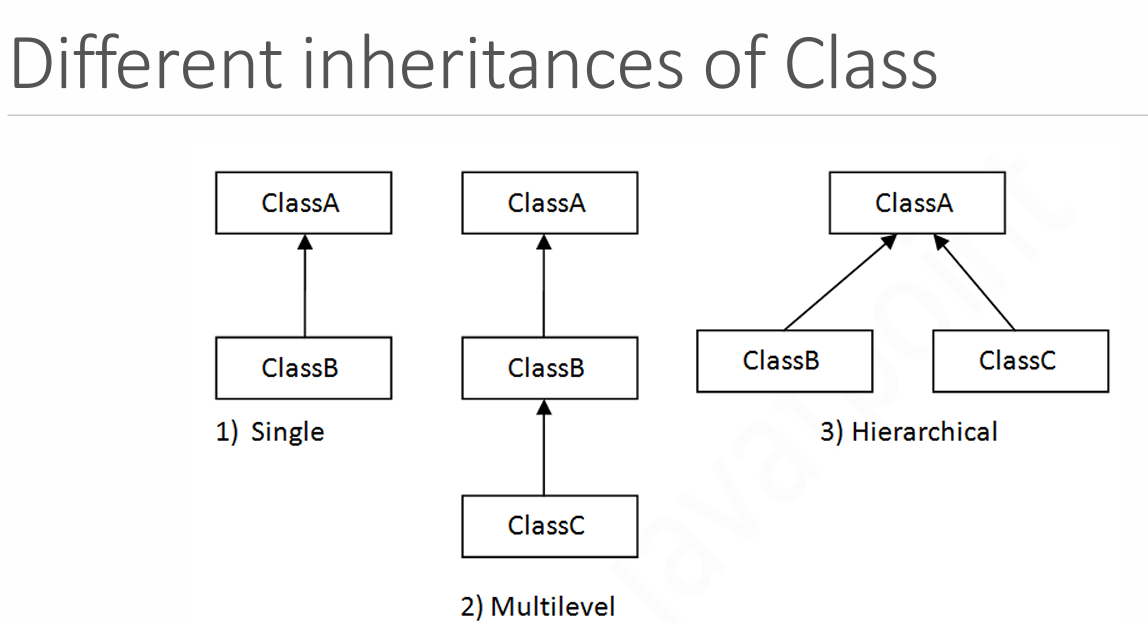

# Multi Level Inheritance


In [193]:
class Employee2:

    def __init__(self, emp_id, name):
        self.emp_id = emp_id
        self.name = name

    def get_employee_info(self):
        print(f"Employee id : {self.emp_id}, Name : {self.name}")

In [194]:
class Manager(Employee2):
    def __init__(self, emp_id: int, name: str, department: str):
        super().__init__(emp_id, name)
        self.department = department

    def get_department(self):
        print(f"Manager Department: {self.department}")

In [195]:
class ProjectManager(Manager):

    def __init__(self, emp_id: int, name: str, department: str, project: str):
        super().__init__(emp_id, name, department)
        self.project = project

    def get_project(self):
        print(f"Project Name : {self.project}")

In [196]:
e1 = Employee2(emp_id=105, name="Pari")

In [197]:
e1.emp_id

105

In [198]:
e1.name

'Pari'

In [200]:
e1.get_employee_info()

Employee id : 105, Name : Pari


In [201]:
 m1 = Manager(emp_id=103, name="Sarthak", department="Mechanical")

In [202]:
m1.emp_id

103

In [203]:
m1.name

'Sarthak'

In [204]:
m1.department

'Mechanical'

In [206]:
m1.get_employee_info()

Employee id : 103, Name : Sarthak


In [207]:
m1.get_department()

Manager Department: Mechanical


In [209]:
m1.get_employee_info()
m1.get_department()

Employee id : 103, Name : Sarthak
Manager Department: Mechanical


In [210]:
pm1 = ProjectManager(
    emp_id=102, name="Aditi", department="Mechanical", project="DriveTrain"
)

In [211]:
pm1.emp_id

102

In [212]:
pm1.department

'Mechanical'

In [213]:
pm1.project

'DriveTrain'

In [214]:
pm1.get_project()

Project Name : DriveTrain


In [217]:
pm1.get_employee_info()

Employee id : 102, Name : Aditi


In [218]:
pm1.get_employee_info()
pm1.get_department()

Employee id : 102, Name : Aditi
Manager Department: Mechanical


In [219]:
pm1.get_department()

Manager Department: Mechanical


In [221]:
pm1.get_employee_info()
pm1.get_department()
pm1.get_project()

Employee id : 102, Name : Aditi
Manager Department: Mechanical
Project Name : DriveTrain


### Hierarchial Inheritance
1. Single Parent Class
2. Multiple Child Class

In [259]:
class shape:

    def perimeter(self):
        pass

    def area(self):
        pass

    def print_area_and_perimeter(self):
        print(f"Perimeter : {self.perimeter():.2f} ")
        print(f"Area : {self.area():.2f}")

In [260]:
class Rectangle(shape):

    def __init__(self, length: float, height: float):
        super().__init__()
        self.length = length
        self.height = height

    def perimeter(self):
        return 2 * (self.length + self.height)

    def area(self):
        return self.length * self.height

In [261]:
import math


class Circle(shape):

    def __init__(self, radius: float):
        super().__init__().__init__()
        self.radius = radius

    def perimeter(self):
        return 2 * math.pi * self.radius

    def area(self):
        return math.pi * (self.radius**2)

In [262]:
r = Rectangle(length=10, height=5)
print(type(r))

<class '__main__.Rectangle'>


In [263]:
r.perimeter()

30

In [264]:
r.area()

50

In [265]:
r.print_area_and_perimeter()

Perimeter : 30.00 
Area : 50.00


In [266]:
c = Circle(radius=21)
print(type(c))

<class '__main__.Circle'>


In [267]:
c.area()

1385.4423602330987

In [268]:
c.perimeter()

131.94689145077132

In [269]:
c.print_area_and_perimeter()

Perimeter : 131.95 
Area : 1385.44
